In [1]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

## Question 1

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

modelp = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())

res = cross_validate(modelp, data_numerical, target, cv=10, return_estimator=True)
res

{'fit_time': array([0.00624752, 0.00488448, 0.00475812, 0.00475001, 0.00471377,
        0.00476146, 0.00469804, 0.00467825, 0.0046792 , 0.00468683]),
 'score_time': array([0.00164604, 0.00158572, 0.00155759, 0.00157356, 0.00156045,
        0.00155878, 0.00156212, 0.00154161, 0.00154185, 0.00155711]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]

In [4]:
coef = lambda i: (res['estimator'][i]['linearregression'].coef_.min(), res['estimator'][i]['linearregression'].coef_.max())

In [5]:
for i in range(10):
    print(coef(i))

(-11452.579552290312, 20942.868431280862)
(-9.225231621952076e+17, 7.613008892997695e+17)
(-12331.08782519339, 19834.47165586814)
(-12098.283261129434, 20243.844165567145)
(-11102.150641671687, 19634.196816747262)
(-12314.284176304785, 22652.887617370114)
(-12330.155440028459, 20200.50971915263)
(-11455.220153557719, 20103.706511184595)
(-13818.618978498793, 17152.207506610623)
(-4.131841968591183e+18, 3.4302062667278464e+18)


## Question 2

In [6]:
from sklearn.linear_model import Ridge


modelp = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())

res = cross_validate(modelp, data_numerical, target, cv=10, return_estimator=True)
res

{'fit_time': array([0.00498533, 0.00458503, 0.00451636, 0.00451994, 0.00450826,
        0.00453115, 0.00451708, 0.0045073 , 0.00449681, 0.00582671]),
 'score_time': array([0.00158095, 0.00156069, 0.0015595 , 0.00154042, 0.00154138,
        0.00154686, 0.00153899, 0.00155115, 0.00154138, 0.00181079]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()), ('ridge', Ridge())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()), ('ridge', Ridge())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()), ('ridge', Ridge())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()), ('ridge', Ridge())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()), ('ridge', Ridge())]),
  Pipeline(steps=[('stand

In [7]:
coef = lambda i: (res['estimator'][i]['ridge'].coef_.min(), res['estimator'][i]['ridge'].coef_.max())
for i in range(10):
    print(coef(i))

(-11423.498366322343, 20868.215473229237)
(-11753.764129308769, 20330.3048222674)
(-12298.72607102502, 19764.802441610966)
(-12068.0446012715, 20169.14244525176)
(-11073.611327507875, 19570.048685168844)
(-12285.826018754145, 22561.85645325165)
(-12298.904718374271, 20127.805614522356)
(-11426.365103713435, 20032.776933179226)
(-13781.812385930034, 17143.06969607203)
(-12766.640919186579, 19143.3426945951)


## Question 3

In [8]:
coefs = [est['ridge'].coef_ for est in res['estimator']]
weights = pd.DataFrame(coefs, columns=numerical_features)
weights

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-520.701583,1394.332126,7678.616805,8808.473600,-270.041862,2933.372718,11937.233636,10101.635929,11967.574463,-1560.564037,...,3343.513054,20868.215473,-1863.829101,4547.323218,2195.315556,-2103.032226,1697.554110,1685.286338,-2025.446524,378.426504
1,-1106.390251,1148.033611,6637.364106,8564.803531,-70.181223,3088.401413,11956.668476,9933.700075,11842.692863,-2770.486291,...,3229.806106,20330.304822,-2322.593475,5400.901026,1700.773840,-3120.947795,883.080283,741.077136,-1787.552552,297.095592
2,-164.131019,493.241149,6863.183656,8498.169638,-658.138989,3238.483429,11859.175790,9363.084762,11954.578610,-1691.420893,...,3340.427154,19764.802442,-1225.927176,5533.880276,1812.478788,-2642.216872,1068.411276,1956.094508,-1761.939270,-1050.605437
3,-264.054192,1969.896672,7844.293345,7968.015720,-561.593210,2709.265869,10989.175122,11243.761722,12776.985308,-1825.006931,...,2145.289789,20169.142445,-1942.770287,4447.464370,3030.373856,-2750.176555,828.758696,1596.117241,-2177.640294,303.754882
4,474.903647,1383.137537,6160.174281,7862.675825,218.595802,3240.930715,11408.726005,8666.073247,11417.081392,-1910.396683,...,3637.008447,19570.048685,323.380776,3937.757650,1974.189303,-2466.087272,982.724715,1960.197678,-1609.006773,-6.524727
5,360.275221,1282.071621,6223.725358,8604.862800,-168.751185,2228.279835,11084.107526,10856.380684,12300.697829,-1488.050294,...,3413.459169,22561.856453,-3181.355643,4834.945815,2113.366440,-2525.817045,1051.796131,1376.473105,-2243.213574,273.947322
6,-536.051289,1808.352973,6978.421816,8121.604418,358.864078,3629.677299,12189.544187,8743.927721,12781.923455,-1439.194782,...,3061.677883,20127.805615,-947.479851,5792.154742,2543.634566,-2578.124762,1548.486125,1958.471899,-1807.166903,252.531717
7,-682.275241,1324.235961,6980.907126,8080.332463,-413.337755,2405.984294,10672.328896,10822.520913,11239.294498,-1279.923974,...,3758.108015,20032.776933,-641.040137,5401.290754,2065.459702,-3392.058947,1050.045951,1612.453015,-1885.455252,313.416997
8,3114.054017,2600.372186,6481.605604,11098.537210,-619.642231,4174.361863,15692.315254,7710.158127,13643.834636,-1735.528228,...,2270.885092,11610.608799,4623.099297,3289.713416,2028.025791,-3111.626281,32.716090,1282.097780,70.601154,608.205089
9,5.296663,1678.405759,6967.519765,8134.059358,199.057810,3133.183524,11688.534316,9579.342056,12095.367093,-1482.704121,...,2670.864975,19143.342695,-77.193781,4445.513280,1494.094884,-2662.894482,294.511865,2172.625290,-2417.383218,102.502436


<AxesSubplot:>

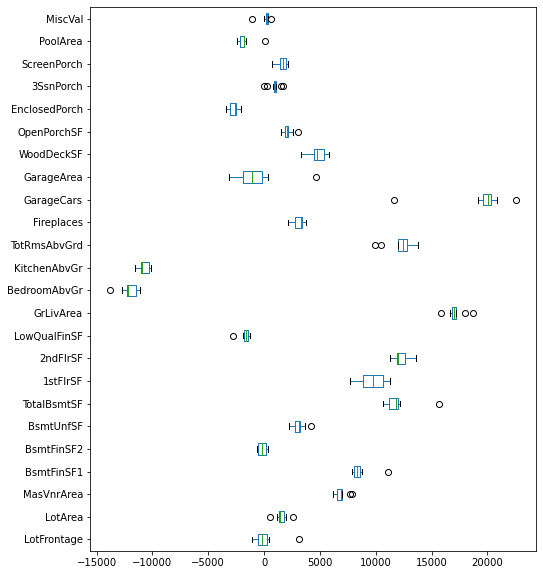

In [9]:
weights.plot.box(vert=False, figsize=(8,10))

In [10]:
weights.describe()["GarageCars"]

count       10.000000
mean     19417.890436
std       2895.195881
min      11610.608799
25%      19618.737124
50%      20080.291274
75%      20290.014228
max      22561.856453
Name: GarageCars, dtype: float64

## Question 4

<AxesSubplot:>

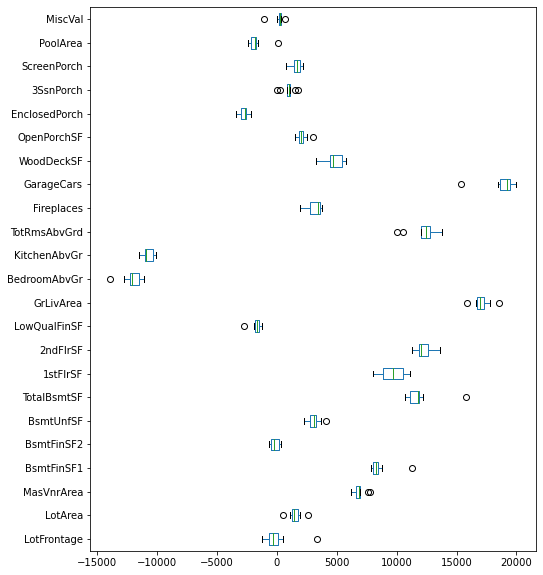

In [11]:
data_numerical2 = data_numerical.drop('GarageArea', axis=1)
numerical_features2 = numerical_features.copy()
numerical_features2.remove('GarageArea')

res = cross_validate(modelp, data_numerical2, target, cv=10, return_estimator=True)
coefs = [est['ridge'].coef_ for est in res['estimator']]
weights = pd.DataFrame(coefs, columns=numerical_features2)
weights.plot.box(vert=False, figsize=(8,10))

In [12]:
numerical_features2

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [13]:
weights["GarageCars"].describe()

count       10.000000
mean     18837.583875
std       1305.925168
min      15402.011069
25%      18650.876471
50%      19223.880717
75%      19480.026815
max      19964.350894
Name: GarageCars, dtype: float64

# Question 5

<Figure size 576x576 with 0 Axes>

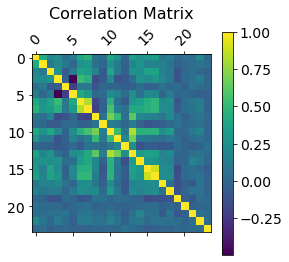

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.matshow(data_numerical.corr())
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

"GarageCars", "GarageArea" are 15th and 16th variables, respectively.

# Question 6

In [15]:
from sklearn.linear_model import RidgeCV

In [16]:
import numpy as np

modelp = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV(alphas=np.logspace(-1, 3, num=30)))

In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data_numerical, target, test_size=.2)
modelp.fit(data_train, target_train)
pred = modelp.predict(data_test)

<AxesSubplot:>

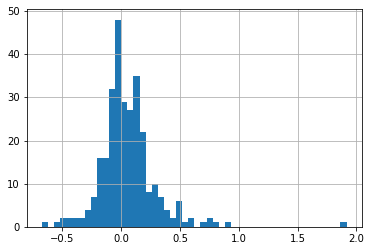

In [18]:
((pred - target_test)/target_test).hist(bins=50)

In [19]:
modelp['ridge'].get_params()

KeyError: 'ridge'

In [20]:
res = cross_validate(modelp, data_numerical, target, cv=10, return_estimator=True)
res

{'fit_time': array([0.00986838, 0.00824451, 0.00818729, 0.0081768 , 0.0081768 ,
        0.00819683, 0.00817108, 0.00813866, 0.00817537, 0.00817919]),
 'score_time': array([0.00180554, 0.00156713, 0.00153542, 0.00155425, 0.00155187,
        0.00154757, 0.00154448, 0.00154519, 0.00155807, 0.0015502 ]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('ridgecv',
                   RidgeCV(alphas=array([1.00000000e-01, 1.37382380e-01, 1.88739182e-01, 2.59294380e-01,
         3.56224789e-01, 4.89390092e-01, 6.72335754e-01, 9.23670857e-01,
         1.26896100e+00, 1.74332882e+00, 2.39502662e+00, 3.29034456e+00,
         4.52035366e+00, 6.21016942e+00, 8.53167852e+00, 1.17210230e+01,
         1.61026203e+01, 2.21221629e+01, 3.03919538e+01, 4.17531894e+01,
         5.73615251e+01, 7.88046282e+01, 1.08263673e+02, 1.48735211e+02,
         2.04335972e+02, 2.80721620e+02, 3.85662042e+02, 5.29831691e+02,
  

In [21]:
coefs = [est['ridgecv'].coef_ for est in res['estimator']]
weights = pd.DataFrame(coefs, columns=numerical_features)
weights

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,444.392760,1581.972903,7846.287513,7474.693334,-448.368422,2863.438322,10423.121029,8764.428380,9003.527073,-1152.131577,...,5585.546747,12864.145670,6605.485717,4775.623241,3256.557122,-2095.287870,1557.241401,1521.927260,-1213.937606,58.355197
1,63.554383,1482.608808,7066.742192,7279.132260,-266.578387,2872.601408,10334.553672,8543.692040,9068.025413,-2099.373629,...,5422.898407,12409.111317,6279.005865,5645.317562,2830.961180,-2720.691546,940.225384,696.980242,-1018.010567,2.703350
2,559.238579,1048.987642,7275.916288,7115.069350,-810.666132,3053.785089,10179.931275,8315.059366,9117.202099,-1245.724998,...,5466.410039,12378.349305,6599.684867,5685.643719,2988.838977,-2443.291284,1057.333048,1699.792769,-1026.817193,-1108.887500
3,510.761396,2058.333364,8004.158316,6934.411236,-715.001864,2753.456749,9884.723279,8937.435995,9489.522433,-1335.103409,...,4976.263946,12385.024984,6537.094752,4863.229337,3917.341067,-2424.684616,924.301784,1372.387371,-1237.764639,1.025139
4,1081.996817,1705.494811,6579.486695,6625.616485,-126.369738,3063.511067,9833.497525,7786.736127,8789.977896,-1336.110163,...,5497.235996,12630.476575,7356.444806,4331.338405,3010.329679,-2326.687970,1009.965843,1835.612228,-915.170210,-122.466809
5,945.933198,1533.725715,6787.217447,7470.750973,-408.938851,2311.249417,9898.882015,8906.896827,9031.808950,-1162.684078,...,5744.449066,13258.282172,6430.568302,5055.912847,3056.175522,-2392.835937,1044.126414,1130.825438,-1268.844371,-11.741262
6,383.095927,1977.839699,7231.880712,6802.480121,-31.296918,3191.916221,10240.007908,8093.817113,9565.391143,-1036.545608,...,5131.923134,12596.184459,7022.128215,5791.571253,3499.290121,-2499.254368,1317.783923,1712.279322,-1086.586503,17.239272
7,402.570679,1615.563490,7349.358767,7072.877027,-589.278149,2574.038519,9725.982879,8912.691428,8766.346977,-928.185530,...,5889.947701,12645.553628,7091.190225,5566.568451,3144.272823,-3031.573628,1125.630629,1593.838019,-1144.740666,43.129660
8,2924.438180,2597.252422,6673.340244,10629.328396,-727.039312,3944.049323,14919.859041,7945.555187,12792.948846,-1634.841645,...,2886.331622,10903.999081,5815.331684,3491.796452,2411.174518,-2974.591901,99.726941,1307.484637,19.631125,560.587782
9,764.264463,1883.925786,7300.015483,6876.454589,-136.886912,2965.733624,10087.695563,8482.928030,9291.943057,-1126.031739,...,5065.124945,12485.468479,7099.982613,4845.766176,2908.352834,-2413.781055,324.323675,1984.668584,-1492.986832,-109.118612


<AxesSubplot:>

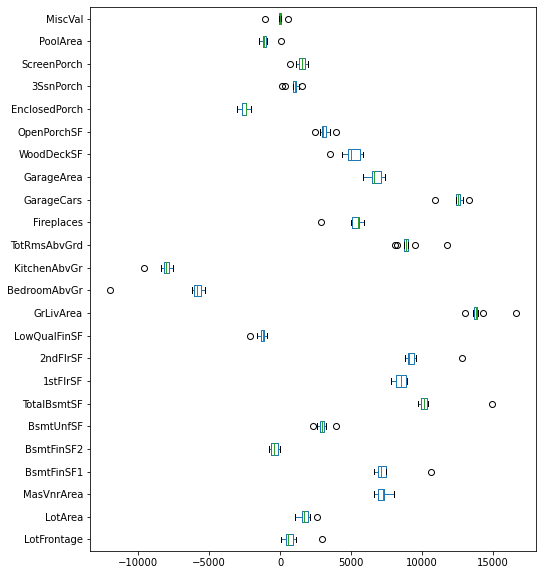

In [22]:
weights.plot.box(vert=False, figsize=(8,10))

## Question 7

In [23]:
[res['estimator'][i][-1].alpha_ for i in range(10)]

[385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 57.361525104486816,
 385.6620421163472]

## Question 8

In [24]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [25]:
target.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [26]:
target.value_counts(normalize=True)

 <=50K    0.760718
 >50K     0.239282
Name: class, dtype: float64

In [27]:
data.shape

(48842, 4)

## Question 9

In [28]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [29]:
data['age'].value_counts(dropna=False)

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [30]:
data['capital-gain'].value_counts(dropna=False)

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
6612         1
2387         1
22040        1
1731         1
Name: capital-gain, Length: 123, dtype: int64

In [31]:
data['capital-loss'].value_counts(dropna=False)

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
155         1
1870        1
2465        1
1911        1
2080        1
Name: capital-loss, Length: 99, dtype: int64

In [32]:
data['hours-per-week'].value_counts(dropna=False)

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
82        1
69        1
Name: hours-per-week, Length: 96, dtype: int64

In [33]:
data.isnull().any()

age               False
capital-gain      False
capital-loss      False
hours-per-week    False
dtype: bool

In [34]:
data.isnull().values.any()

False

In [35]:
from sklearn.linear_model import LogisticRegression
modelLogiR = make_pipeline(StandardScaler(), LogisticRegression())

res = cross_validate(modelLogiR, data, target, cv=10, return_estimator=True)
res

{'fit_time': array([0.07098198, 0.06960607, 0.07273412, 0.07230449, 0.07305884,
        0.07169867, 0.07076097, 0.07197094, 0.07252789, 0.07103205]),
 'score_time': array([0.0067966 , 0.00670743, 0.00681639, 0.00709343, 0.00661755,
        0.00669527, 0.00667882, 0.00664949, 0.00690246, 0.00656891]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (

## Question 10

In [36]:
res['test_score'].mean()

0.7998445658834604

## Question 11

In [37]:
pd.DataFrame([res['estimator'][i][-1].coef_[0] for i in range(10)], columns=data.columns)

,age,capital-gain,capital-loss,hours-per-week
0,0.522043,2.466777,0.306030,0.539635
1,0.526067,2.406533,0.308178,0.541824
2,0.524257,2.455923,0.308124,0.543843
3,0.520375,2.450482,0.309170,0.534597
4,0.519259,2.512010,0.304243,0.546715
5,0.521732,2.441632,0.304017,0.541286
6,0.520235,2.473723,0.306893,0.536374
7,0.523958,2.445321,0.308326,0.538253
8,0.516454,2.405087,0.308394,0.535121
9,0.516737,2.450489,0.301394,0.535532


In [38]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [39]:
data.columns.to_list()

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

## Question 12

In [40]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [41]:
data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,29,?,HS-grad,Never-married,?,Unmarried,Black,Male,0,0,40,United-States
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [49]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numcolnames = selector(dtype_exclude=object)
categcolname = selector(dtype_include=object)

ctrf = ColumnTransformer([('cat', OneHotEncoder(), categcolname(data)),
                   ('num', StandardScaler(), numcolnames(data))])

model = make_pipeline(ctrf, LogisticRegression())

res = cross_validate(model, data, target, cv=10, return_estimator=True)
res



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'fit_time': array([0.53952408, 0.53815198, 0.52037573, 0.54280281, 0.52756739,
        0.54033303, 0.52596593, 0.53941965, 0.53731322, 0.53269863]),
 'score_time': array([0.01881504, 0.01849031, 0.01835561, 0.01861048, 0.01842642,
        0.01848149, 0.02043343, 0.00937724, 0.0184958 , 0.01851869]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                                                     'race', 'sex',
                                                     'native-country']),
                                                   ('num', StandardScaler(),
                                                    ['age', 'capital-gain',
                                          

In [50]:
np.nanmean(res['test_score'])

0.8516765905199886

## Question 13

In [51]:
ctrf.fit(data)
feature_names = (ctrf.named_transformers_["cat"]
                             .get_feature_names(categcolname(data))).tolist()
feature_names += numcolnames(data)

In [52]:
ctrf.named_transformers_['cat'].get_feature_names(categcolname(data)).tolist()

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

In [70]:
weights = pd.DataFrame([res['estimator'][i][-1].coef_[0] for i in range(10)], columns=feature_names)
weights

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,-0.288476,0.522380,-0.156673,-0.087365,0.014018,0.168799,-0.528043,-0.337185,-0.515919,-0.902873,...,0.068638,-0.428729,-0.612906,0.328105,-0.723659,0.625738,0.331637,2.365760,0.257836,0.354048
1,-0.277716,0.491571,-0.115764,-0.084488,0.013633,0.151686,-0.498170,-0.287876,-0.594171,-0.929286,...,0.050488,-0.392888,-0.419316,0.260503,-0.780220,0.395724,0.336567,2.308917,0.260789,0.355142
2,-0.288211,0.508068,-0.129861,-0.081913,0.044792,0.201433,-0.490174,-0.275746,-0.696318,-0.948972,...,0.017843,-0.482857,-0.562691,0.343404,-0.915842,0.761388,0.338469,2.344580,0.261619,0.358385
3,-0.324168,0.474384,-0.113163,-0.077778,0.007212,0.150068,-0.524790,-0.277578,-0.500947,-0.897373,...,0.070310,-0.374039,-0.346517,0.285843,-0.907639,0.667584,0.336110,2.357924,0.258284,0.352146
4,-0.329041,0.516983,-0.110089,-0.075308,0.018786,0.143138,-0.530464,-0.303585,-0.511289,-0.989305,...,0.220080,-0.455601,-0.592300,0.265375,-0.891627,0.367074,0.332734,2.411451,0.263780,0.358735
5,-0.308529,0.505366,-0.152914,-0.077509,0.021298,0.188066,-0.562892,-0.301514,-0.528018,-0.978305,...,0.051889,-0.490762,-0.526174,0.293443,-0.760472,0.389340,0.343721,2.352127,0.255817,0.361820
6,-0.317885,0.511719,-0.149044,-0.076345,0.003988,0.134843,-0.556367,-0.309015,-0.467340,-0.892641,...,-0.098189,-0.412967,-0.709679,0.304561,-0.811703,0.600154,0.333826,2.357410,0.256563,0.355447
7,-0.311198,0.464291,-0.124602,-0.084836,-0.015254,0.116830,-0.541355,-0.316479,-0.378670,-0.926969,...,-0.517868,-0.599157,0.319266,-0.757897,0.690822,0.338016,2.343441,0.261872,0.351039,NaN
8,-0.314479,0.487259,-0.124944,-0.081034,0.003011,0.164437,-0.523780,-0.350533,-0.426826,-0.999475,...,0.142313,-0.496777,-0.454040,0.293333,-1.043692,0.592492,0.327139,2.291989,0.264799,0.352143
9,-0.363713,0.459596,-0.174281,-0.013793,-0.020280,0.123257,-0.556968,-0.311398,-0.324516,-0.847584,...,0.043555,-0.482282,-0.846276,0.311022,-0.822019,0.806652,0.337390,2.346401,0.256811,0.351872


In [75]:
weights.mean().sort_values(ascending=False)

capital-gain                          2.139843
education_ Doctorate                  1.911704
education_ Prof-school                1.859036
marital-status_ Married-civ-spouse    1.459787
marital-status_ Married-AF-spouse     1.377662
                                        ...   
education_ 7th-8th                   -1.324289
education_ 1st-4th                   -1.347756
occupation_ Priv-house-serv          -1.364254
education_ Preschool                 -1.455402
native-country_ Columbia             -1.467138
Length: 106, dtype: float64